In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from IPython.display import clear_output
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [45]:
engine = dict()
engine['stca'] = pd.read_csv('../cases/stca/engine/engine_deck_stca.csv')
engine['a10'] = pd.read_csv('../cases/a10/engine/engine_deck_a10.csv')

stca :  0.757073419844557
a10 :  0.7247851925181609


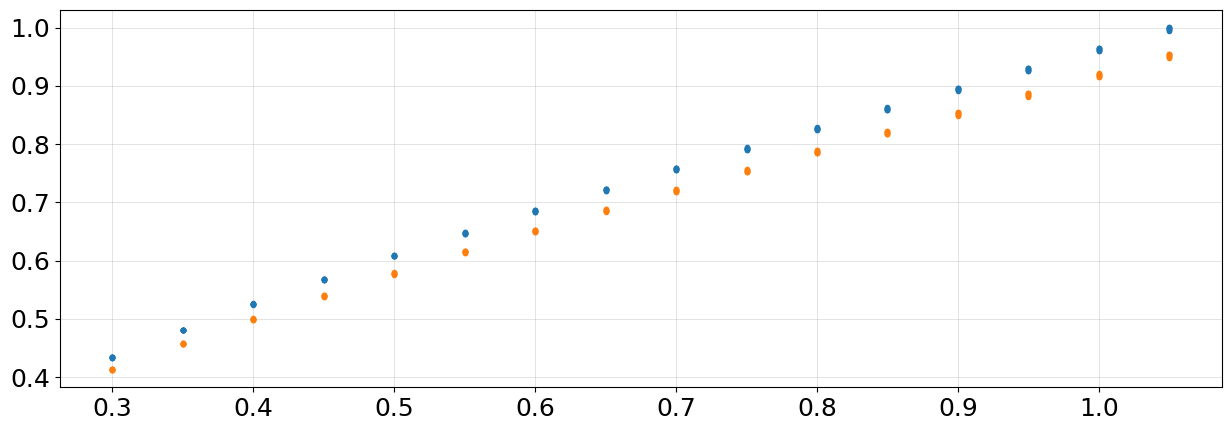

In [50]:
plt.figure(figsize=(15,5))
plt.style.use('plot.mplstyle')

for ac_name in ['stca', 'a10']:
    idx = engine[ac_name]['M_0 [-]']==0.3

    T_0 = 288.15 - engine[ac_name]['z [m]'][idx].values*0.0065
    a_0 = np.sqrt(1.4*287*T_0)
    V_0 = engine[ac_name]['M_0 [-]'][idx].values * a_0

    TS = engine[ac_name]['T/TMAX [-]'][idx].values
    F_sp = (engine[ac_name]['jet_V [m/s]'][idx].values-V_0)/a_0
    
    dF_sp_dTS = (np.max(F_sp)-np.min(F_sp))/0.75
    
    print(ac_name, ': ', dF_sp_dTS)
    
    plt.plot(TS, F_sp, 'o')


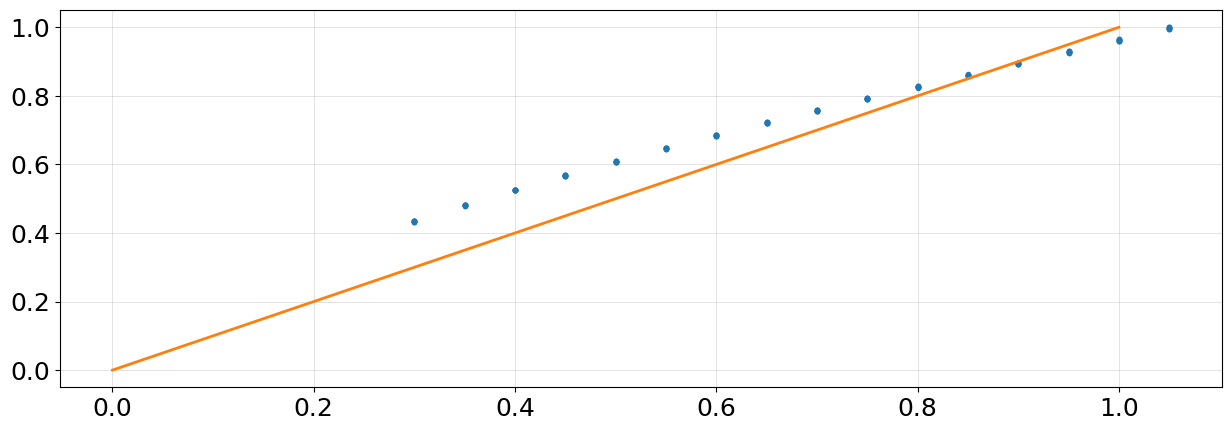

In [32]:
np.unique(engine['M_0 [-]'].values)

array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ])